In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('logistic_regression.csv')
print("Data Sample:")
print(data.head())
print("\nData Info:")
print(data.info())

Data Sample:
   loan_amnt        term  int_rate  installment grade sub_grade  \
0      10000   36 months     11.44       329.48     B        B4   
1       8000   36 months     11.99       265.68     B        B5   
2      15600   36 months     10.49       506.97     B        B3   
3       7200   36 months      6.49       220.65     A        A2   
4      24375   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0       16       0     36369       41.8        25                    w 

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


In [ ]:
col = ['title','emp_length','emp_title']
for each in col:
    data[each].fillna(value=data[each].mode()[0],inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17080\1391019706.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[each].fillna(value=data[each].mode()[0],inplace=True)


In [30]:
mean_col = ['revol_util','mort_acc','pub_rec_bankruptcies']
for each in mean_col:
    data[each].fillna(value=data[each].mean(),inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17080\1992797291.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[each].fillna(value=data[each].mean(),inplace=True)


In [15]:
data.shape

(335867, 27)

In [16]:
num_col = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal',
           'revol_util','total_acc','mort_acc','pub_rec_bankruptcies']

In [17]:
cat_col = [ 'term', 'grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d','purpose', 'title', 
       'earliest_cr_line','initial_list_status', 'application_type','address']

In [18]:
cat_col_df = data[cat_col]
cat_col_df.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-15,vacation,Vacation,Jun-90,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-15,debt_consolidation,Debt consolidation,Jul-04,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-15,credit_card,Credit card refinancing,Aug-07,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-14,credit_card,Credit card refinancing,Sep-06,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-13,credit_card,Credit Card Refinance,Mar-99,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [19]:
cat_col_df['emp_title'].value_counts()

emp_title
Teacher                                  4367
Manager                                  4231
Registered Nurse                         1841
RN                                       1840
Supervisor                               1812
                                         ... 
Journeyman  Pipefitter                      1
91 A                                        1
Vice President - Relationship Manager       1
Arborist                                    1
Gracon Services, Inc                        1
Name: count, Length: 150831, dtype: int64

In [20]:
cat_col_df['emp_title'].nunique()

150831

<Axes: xlabel='term', ylabel='count'>

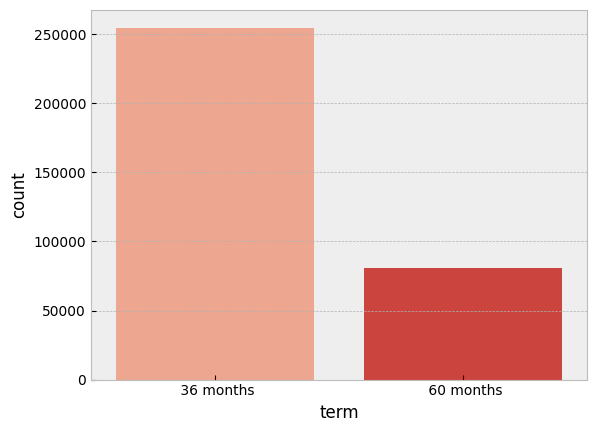

In [22]:
plt.style.use('bmh')
sns.countplot(x='term',data=data, hue='term',palette='Reds')

<Axes: xlabel='grade', ylabel='count'>

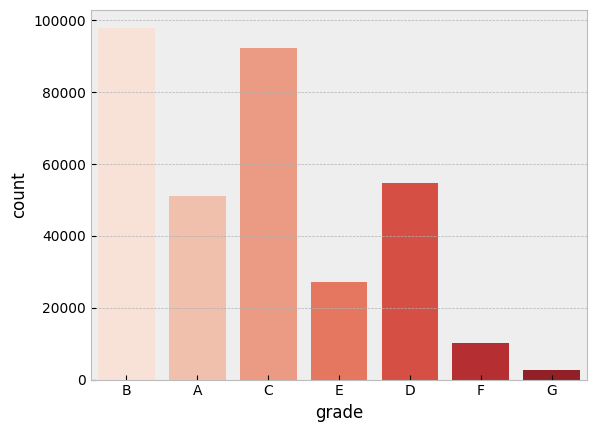

In [23]:
plt.style.use('bmh')
sns.countplot(x='grade',data=data,hue='grade',palette='Reds')

<Axes: xlabel='loan_status', ylabel='count'>

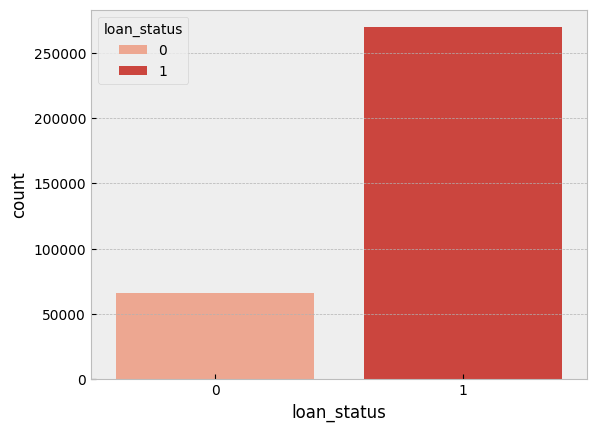

In [49]:
plt.style.use('bmh')
sns.countplot(x='loan_status',data=data,hue='loan_status',palette='Reds')

<Axes: xlabel='home_ownership', ylabel='count'>

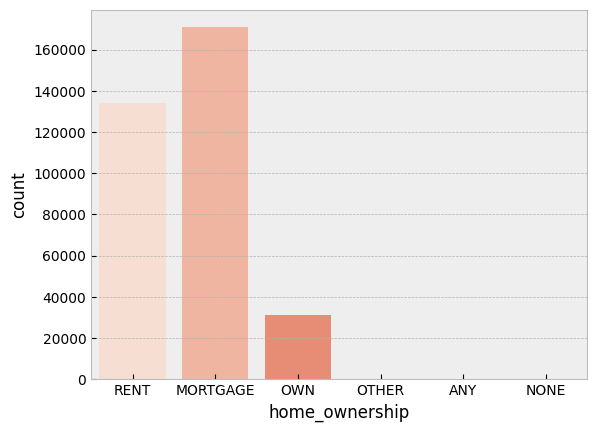

In [24]:
plt.style.use('bmh')
sns.countplot(x='home_ownership',data=data,hue='home_ownership',palette='Reds')

In [26]:
cat_col_df['emp_length'].value_counts()

emp_length
10+ years    115199
2 years       31393
3 years       27448
< 1 year      27366
5 years       22974
1 year        22613
4 years       20320
7 years       18768
6 years       18388
8 years       17500
9 years       13898
Name: count, dtype: int64

<Axes: xlabel='verification_status', ylabel='count'>

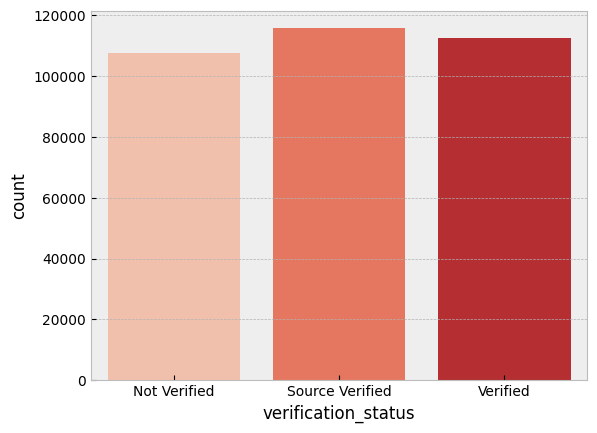

In [27]:
plt.style.use('bmh')
sns.countplot(x='verification_status',data=data,hue='verification_status',palette='Reds')

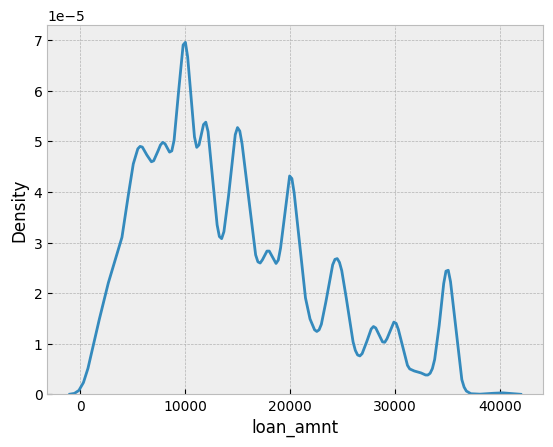

In [28]:
num_col_df = data[num_col]
sns.kdeplot(data = num_col_df, x = 'loan_amnt')
plt.show()

In [ ]:
data.loc[data["emp_length"] != "10+ years", "emp_length"] = 0
data.loc[data["emp_length"] == "10+ years", "emp_length"] = 1
# Replacing all values <10 as 0 and 10+ as 1 in emp_length column

In [37]:
#data['issue_d'] = pd.to_datetime(data['issue_d'])
#data['issue_year'] = data['issue_d'].dt.year
#data['issue_month'] = data['issue_d'].dt.month
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,1,RENT,117000.0,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,0,MORTGAGE,65000.0,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,0,RENT,43057.0,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,0,RENT,54000.0,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,0,MORTGAGE,55000.0,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [38]:
#Dropping columns that:
#are numerical but have positive corelation
#are categorical but are adding no extra information
data.drop(columns = ['installment','pub_rec_bankruptcies', 'open_acc','issue_d','earliest_cr_line','title','emp_title','address',
                     'sub_grade'],axis = 1, inplace = True)

In [40]:
data['term'] = data.term.str.replace(' months','').astype(int)

In [41]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['grade']= label_encoder.fit_transform(data['grade']) 
data['grade'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [43]:
data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc
0,10000,36,11.44,1,1,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,0,36369,41.8,25,w,INDIVIDUAL,0.0
1,8000,36,11.99,1,0,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,0,20131,53.3,27,f,INDIVIDUAL,3.0
2,15600,36,10.49,1,0,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,0,11987,92.2,26,f,INDIVIDUAL,0.0
3,7200,36,6.49,0,0,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,0,5472,21.5,13,f,INDIVIDUAL,0.0
4,24375,60,17.27,2,0,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,0,24584,69.8,43,f,INDIVIDUAL,1.0


In [44]:
#Lets replace not verified - 0, verified - 1, Source verified - 2
data.loc[data['verification_status']=='Not Verified','verification_status'] = 0
data.loc[data['verification_status']=='Verified','verification_status'] = 1
data.loc[data['verification_status']=='Source Verified','verification_status'] = 2

In [45]:
#Replacing charged off as 0 and fully paid as 1
data.loc[data['loan_status']=='Fully Paid','loan_status']=1
data.loc[data['loan_status']=='Charged Off','loan_status']=0

In [46]:
#Putting initial list status : w(whole) - 1, f (fractional) - 0
data.loc[data['initial_list_status']=='w','initial_list_status'] = 1
data.loc[data['initial_list_status']=='f','initial_list_status'] = 0

In [47]:
#splitting the dataset
X = data.drop(columns = 'loan_status')
y = data['loan_status'].astype('int')

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335867 entries, 0 to 396028
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            335867 non-null  int64  
 1   term                 335867 non-null  int64  
 2   int_rate             335867 non-null  float64
 3   grade                335867 non-null  int64  
 4   emp_length           335867 non-null  object 
 5   home_ownership       335867 non-null  object 
 6   annual_inc           335867 non-null  float64
 7   verification_status  335867 non-null  object 
 8   purpose              335867 non-null  object 
 9   dti                  335867 non-null  float64
 10  pub_rec              335867 non-null  int64  
 11  revol_bal            335867 non-null  int64  
 12  revol_util           335867 non-null  float64
 13  total_acc            335867 non-null  int64  
 14  initial_list_status  335867 non-null  object 
 15  application_type     3

In [51]:
data

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc
0,10000,36,11.44,1,1,RENT,117000.0,0,1,vacation,26.24,0,36369,41.8,25,1,INDIVIDUAL,0.0
1,8000,36,11.99,1,0,MORTGAGE,65000.0,0,1,debt_consolidation,22.05,0,20131,53.3,27,0,INDIVIDUAL,3.0
2,15600,36,10.49,1,0,RENT,43057.0,2,1,credit_card,12.79,0,11987,92.2,26,0,INDIVIDUAL,0.0
3,7200,36,6.49,0,0,RENT,54000.0,0,1,credit_card,2.60,0,5472,21.5,13,0,INDIVIDUAL,0.0
4,24375,60,17.27,2,0,MORTGAGE,55000.0,1,0,credit_card,33.95,0,24584,69.8,43,0,INDIVIDUAL,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000,36,13.11,1,0,RENT,64000.0,0,1,debt_consolidation,10.81,0,11456,97.1,9,1,INDIVIDUAL,0.0
396025,10000,60,10.99,1,0,RENT,40000.0,2,1,debt_consolidation,15.63,0,1990,34.3,23,1,INDIVIDUAL,0.0
396026,21000,36,12.29,2,0,MORTGAGE,110000.0,2,1,debt_consolidation,21.45,0,43263,95.7,8,0,INDIVIDUAL,1.0
396027,5000,36,9.99,1,1,RENT,56500.0,1,1,debt_consolidation,17.56,0,32704,66.9,23,0,INDIVIDUAL,0.0


In [52]:
data.loc[data['home_ownership']=='RENT','home_ownership'] = 0
data.loc[data['home_ownership']=='MORTGAGE','home_ownership'] = 1
data.loc[data['home_ownership']=='OWN','home_ownership'] = 2
data.loc[data['home_ownership']=='ANY','home_ownership'] = 3
data.loc[data['home_ownership']=='OTHER','home_ownership'] = 4
data.loc[data['home_ownership']=='NONE','home_ownership'] = 5

In [53]:
data

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc
0,10000,36,11.44,1,1,0,117000.0,0,1,vacation,26.24,0,36369,41.8,25,1,INDIVIDUAL,0.0
1,8000,36,11.99,1,0,1,65000.0,0,1,debt_consolidation,22.05,0,20131,53.3,27,0,INDIVIDUAL,3.0
2,15600,36,10.49,1,0,0,43057.0,2,1,credit_card,12.79,0,11987,92.2,26,0,INDIVIDUAL,0.0
3,7200,36,6.49,0,0,0,54000.0,0,1,credit_card,2.60,0,5472,21.5,13,0,INDIVIDUAL,0.0
4,24375,60,17.27,2,0,1,55000.0,1,0,credit_card,33.95,0,24584,69.8,43,0,INDIVIDUAL,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000,36,13.11,1,0,0,64000.0,0,1,debt_consolidation,10.81,0,11456,97.1,9,1,INDIVIDUAL,0.0
396025,10000,60,10.99,1,0,0,40000.0,2,1,debt_consolidation,15.63,0,1990,34.3,23,1,INDIVIDUAL,0.0
396026,21000,36,12.29,2,0,1,110000.0,2,1,debt_consolidation,21.45,0,43263,95.7,8,0,INDIVIDUAL,1.0
396027,5000,36,9.99,1,1,0,56500.0,1,1,debt_consolidation,17.56,0,32704,66.9,23,0,INDIVIDUAL,0.0


In [54]:
array=data.values
x=array[:,0:8] 
y=array[:, 8]

In [55]:
from sklearn import model_selection
#step2 - split the 50 rows into 2 parts
#part1 - will have training data - 70% of data
#part2 - will have testing data - 30% of data
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression  
#model= LogisticRegression()  
#model.fit(X_train, y_train)

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [67]:
predictions=model.predict(X_test)
print('Answers', predictions)
print('Expected',Y_test)

from sklearn.metrics import r2_score
print('Score',r2_score(predictions,Y_test))

Answers [0. 1. 1. ... 0. 1. 1.]
Expected [1 1 0 ... 0 1 1]
Score -0.7777444221154304


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Use the best model
best_dt = grid_search.best_estimator_


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best R2 Score: 0.08425625139874811


In [69]:
expense = [[10000, 36, 11.44, 1, 1, 0, 117000, 0]]
outcome = model.predict(expense)
print('The outcome is', outcome,)

The outcome is [1.]
